# Natural Language Processing

## Intro to NLP

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
imdb_data = tfds.load(name='imdb_reviews', split='train')  # loading training split of imdb dataset
imdb_df = tfds.as_dataframe(imdb_data)                     # converting tfds to pandas dataframe

In [ ]:
imdb_df.shape

(25000, 2)

In [ ]:
imdb_df.head()

,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


We can see that the text column contains the typed reviews, but we can also see a byte string b" prefixed to that text. We'll decode the byte string using the pandas vectorized string method `str.decode()`:

In [ ]:
imdb_df['text'] = imdb_df['text'].str.decode('utf-8')

In [ ]:
imdb_df.head()

,label,text
0,0,This was an absolutely terrible movie. Don't b...
1,0,"I have been known to fall asleep during films,..."
2,0,Mann photographs the Alberta Rocky Mountains i...
3,1,This is the kind of film for a snowy Sunday af...
4,1,"As others have mentioned, all the women that g..."


In [ ]:
imdb_df['label'].value_counts()

label
0    12500
1    12500
Name: count, dtype: int64

To ease this computational burden without losing too much predictive ability, we'll take a subset of the full dataset:

In [ ]:
imdb_sample = imdb_df.sample(frac=0.2, random_state=100)

In [ ]:
imdb_sample.head()

,label,text
20094,1,"""The Godfather"" of television, but aside from ..."
17218,0,"Okay, I've watched this movie twice now, I hav..."
3773,0,"Okay, so the previews to this film only tells ..."
20529,0,Yet ANOTHER movie about a group of less-than-i...
18073,1,This unpretentious Horror film is probably des...


In [ ]:
imdb_sample['label'].value_counts()

label
1    2537
0    2463
Name: count, dtype: int64

**Text Length**

* Understanding the distribution of text lengths is important for several reasons. First, it can provide insight into a reviewer's messaging strategy. For instance, if most of their reviews are short, it could mean they are aiming for brevity and efficiency. Conversely, if they write longer reviews, it could indicate they are looking to provide detailed information or engage in meaningful dialogue.

* Second, there may be a case where the length of the review is indicative of a positive or negative review. Thus, we can test this hypothesis by comparing statistical values related to each group to see if there is a correlation between the length of a review and its label.

In [ ]:
imdb_sample['text_length'] = [len(review.split()) for review in imdb_sample['text']]

In [ ]:
imdb_sample.head()

,label,text,text_length
20094,1,"""The Godfather"" of television, but aside from ...",243
17218,0,"Okay, I've watched this movie twice now, I hav...",639
3773,0,"Okay, so the previews to this film only tells ...",173
20529,0,Yet ANOTHER movie about a group of less-than-i...,384
18073,1,This unpretentious Horror film is probably des...,32


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

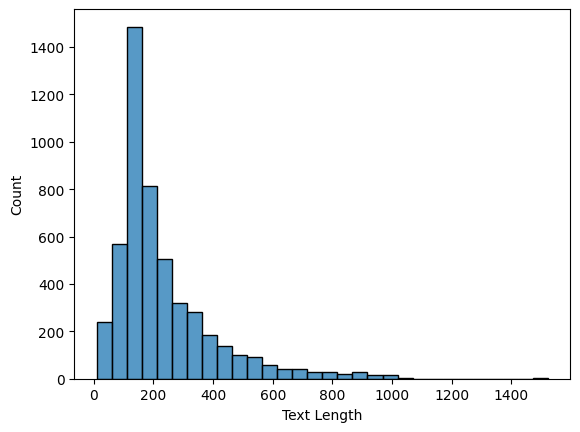

In [ ]:
sns.histplot(data=imdb_sample['text_length'], bins=30)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [ ]:
imdb_sample.groupby('label')['text_length'].median()

label
0    170.0
1    174.0
Name: text_length, dtype: float64

In [ ]:
imdb_sample.groupby('label')['text_length'].mean()

label
0    229.653268
1    232.280252
Name: text_length, dtype: float64

In [ ]:
imdb_sample.groupby('label')['text_length'].std()

label
0    168.537750
1    170.469758
Name: text_length, dtype: float64

From the above code blocks and its results, we can conclude our hypothesis that there is **no correlation** between `text_length` and label (sentiment), since the mean, median and standrad deviation of text length when grouped by labels are similar.

### Visualizing Words

* Visualizing the most frequently used words gives us an idea of the general theme or tone of the dataset. This can help us understand its purpose and potential applications.

* Visualizing the most frequently used words can help us spot errors in the data. For example, if we see that stopwords are being used a lot in the dataset, it could be a sign that we should eliminate them during text preprocessing. Stopwords are words that are commonly used in a language, but have little semantic meaning. Some examples of stopwords in English include "a", "an", "the", "of", "to", and "in".

**Word Frequency**

The first step is to create an object that contains a list of all the words and their associated frequencies. The line of code below creates such an object, `freq_words`:

In [ ]:
freq_words = imdb_sample['text'].str.split(expand=True).stack().value_counts()

The code above calculates the frequency of each unique word in the `text` column of a pandas dataframe df. The text is split into separate words, stacked, and the frequency of each word is counted and sorted in descending order.

Once the `freq_words` object is created, we can extract the top ten most frequently used words and store them in `freq_words_top10` like so:

In [ ]:
freq_words_top100 = freq_words[:100]

In [ ]:
freq_words_top100.index

Index(['the', 'a', 'and', 'of', 'to', 'is', 'in', 'I', 'that', 'this', 'it',
       '/><br', 'was', 'as', 'with', 'for', 'but', 'The', 'on', 'movie', 'are',
       'film', 'have', 'his', 'not', 'be', 'you', 'by', 'he', 'an', 'at',
       'one', 'from', 'like', 'they', 'who', 'all', 'so', 'has', 'just',
       'about', 'or', 'her', 'out', 'some', 'more', 'very', 'This', 'would',
       'what', 'good', 'when', 'which', 'only', 'it's', 'It', 'really', 'if',
       'their', 'had', 'up', 'my', 'can', 'even', 'were', 'see', 'no', 'than',
       'she', '-', 'been', 'into', 'there', 'get', 'story', 'much', 'will',
       'because', 'other', 'time', 'also', 'most', 'we', 'me', 'great', 'make',
       'its', 'any', 'do', 'first', 'could', 'how', 'people', 'made', '/>The',
       'don't', 'bad', 'think', 'being', 'too'],
      dtype='object')

In [ ]:
freq_words_top100.values

array([56231, 30581, 29890, 28119, 26094, 20437, 16656, 13264, 12758,
       11587, 10912, 10323,  9216,  8476,  8312,  7970,  6694,  6562,
        6060,  6003,  5630,  5618,  5430,  5314,  5082,  5074,  5064,
        4278,  4174,  4163,  4147,  4064,  3786,  3632,  3609,  3557,
        3551,  3302,  3294,  3285,  3271,  3232,  3020,  2900,  2768,
        2621,  2532,  2459,  2312,  2300,  2282,  2249,  2210,  2204,
        2195,  2180,  2160,  2150,  2126,  2117,  2103,  2093,  2071,
        2070,  2010,  2009,  2005,  1991,  1881,  1857,  1819,  1782,
        1778,  1726,  1674,  1657,  1653,  1621,  1594,  1583,  1545,
        1521,  1512,  1510,  1485,  1468,  1463,  1448,  1443,  1438,
        1431,  1412,  1410,  1395,  1385,  1372,  1360,  1345,  1247,
        1243])

**Creating a Treemap**

Once we've created the object containing the top 100 most frequently used words, we can use the treemap function from the visualization library plotly.express to generate a treemap.

In [ ]:
import plotly.express as px

fig = px.treemap(freq_words_top100, path=[freq_words_top100.index], values=freq_words_top100.values)
fig.update_layout(title_text='Most Frequent 100 Words in the Dataset', title_font=dict(size=20))
fig.show()

* The above code produces a treemap that contains the ten most frequently used words in the `text` variable of the df dataframe. The path parameter in the call to the `px.treemap()` function specifies the sequence of indices that define the hierarchy of the treemap. In this case, path is set to `freq_words_top100.index`, which means that the treemap will have a single level and will be based on the index of the `freq_words_top100` Series.

* The values parameter specifies the data to use for computing the size of each rectangle in the treemap. In this case, values is set to the values of the `freq_words_top100`, which means that the size of each rectangle will be based on the `freq_words_top100` Series (i.e., the frequency of each word).

* A treemap is a great way to visualize frequently used words by arranging them in rectangles of varying size. The size of each rectangle is directly proportional to the frequency of that word in a given text or dataset.

* Many stopwords are present in the frequently used words - to be removed during text preprocessing.

### Text Preprocessing

* It is a necessary step in any natural language processing (NLP) task, as it helps to clean and standardize the text, making it easier for the NLP algorithm to process. Furthermore, preprocessing can improve the accuracy of our results.

* Preprocessing involves several steps that can help improve the overall quality of our text data. These steps include:
 * Coverting the text to lowercase
 * Removing punctuation from the text
 * Tokenizing the text
 * Removing stopwords from the text
 * Lemmatization (Stemming) of the text

**1. Convert to Lowercase**

Conversion to lower case helps to standardize the data and ensures that we aren't working with duplicated words. For example, words like "Earthquake" and "earthquake" need to be recognized as the same word. Hence, we standardize our data by converting all our text to lowercase.

In [ ]:
imdb_sample['text'] = imdb_sample['text'].str.lower()

In [ ]:
imdb_sample['text'].head()

20094    "the godfather" of television, but aside from ...
17218    okay, i've watched this movie twice now, i hav...
3773     okay, so the previews to this film only tells ...
20529    yet another movie about a group of less-than-i...
18073    this unpretentious horror film is probably des...
Name: text, dtype: object

**2. Removing Punctuation**

* In general, removing punctuation is a good preprocessing step for text data. It can improve the accuracy of text processing algorithms and reduce the amount of noise in the data.
* This is because punctuation can often be interpreted in different ways, depending on the context. For example, a full stop character (also called a period: .) could be interpreted as the end of a sentence, or it could simply be part of an abbreviation (e.g., Mr.). This can sometimes create ambiguity and potentially make it difficult for a model to process the text accurately.

* We'll need the `re` library to complete the punctuation removal task. The Regex (or `re`) is a regular expression library used to match or identify patterns in strings.

* We begin by creating a function that uses the `re.sub()` function to remove punctuation from the text input. Then we `apply()` the function on the entire text column, `text`, from the `imdb_sample` dataframe, and assign it back to itself:

In [ ]:
import re

def punctuation(inputs):
    return re.sub(r'[^\w\s]', ' ', inputs)

imdb_sample['text'] = imdb_sample['text'].apply(punctuation)

The code above is used to substitute any non-word `(^\w)` and non-space `(^\s)` characters with a space `' '` in the `text` column of the dataframe. This effectively removes all punctuation marks from the text.

In [ ]:
imdb_sample['text'].head()

20094     the godfather  of television  but aside from ...
17218    okay  i ve watched this movie twice now  i hav...
3773     okay  so the previews to this film only tells ...
20529    yet another movie about a group of less than i...
18073    this unpretentious horror film is probably des...
Name: text, dtype: object

**3. Tokenization**

* Tokenization breaks up the text into individual words or phrases called tokens, which can make it easier to work with.
* The first library, `nltk`, is the main package which provides access to all other `NLTK` packages. The second library, `punkt`, is used for tokenization — breaking up a sentence into individual words or tokens.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(inputs):
    return word_tokenize(inputs)

imdb_sample['text_tokenized'] = imdb_sample['text'].apply(tokenization)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
imdb_sample.head()

,label,text,text_length,text_tokenized,text_stop,text_lemmatized
20094,1,the godfather of television but aside from ...,243,"[the, godfather, of, television, but, aside, f...","[ , h, e, , g, f, h, e, r, , , f, , e, l, ...","[ , t, h, e, , g, o, d, f, a, t, h, e, r, , ..."
17218,0,okay i ve watched this movie twice now i hav...,639,"[okay, i, ve, watched, this, movie, twice, now...","[k, , , , v, e, , w, c, h, e, , h, , v, ...","[o, k, a, y, , , i, , v, e, , w, a, t, c, ..."
3773,0,okay so the previews to this film only tells ...,173,"[okay, so, the, previews, to, this, film, only...","[k, , , , h, e, , p, r, e, v, e, w, , , ...","[o, k, a, y, , , s, o, , t, h, e, , p, r, ..."
20529,0,yet another movie about a group of less than i...,384,"[yet, another, movie, about, a, group, of, les...","[e, , n, h, e, r, , v, e, , b, u, , , g, ...","[y, e, t, , a, n, o, t, h, e, r, , m, o, v, ..."
18073,1,this unpretentious horror film is probably des...,32,"[this, unpretentious, horror, film, is, probab...","[h, , u, n, p, r, e, e, n, u, , h, r, r, r, ...","[t, h, i, s, , u, n, p, r, e, t, e, n, t, i, ..."


**4. Stop Words**

* Stopwords are words which are commonly used in a language, but have little semantic meaning. They are often used to connect other words in a sentence, or as padding to make a sentence sound more natural.

* In information retrieval, stopwords are usually removed from text before performing any kind of analysis because they can interfere with the learning process and skew the model's results.

* Some examples of stopwords in English include "a", "an", "the", "of", "to", and "in".

* The library `stopwords`, is used to filter out commonly-used words from text that do not contain contextual meaning.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.add('br')

def stopwords_remove(inputs):
    return [word for word in inputs if word not in stop_words]

imdb_sample['text_stop'] = imdb_sample['text_tokenized'].apply(stopwords_remove)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* The above code creates a set of English stopwords and removes the word 'not' from it. This is because the dataset is on movie reviews and the word 'not' is important for correctly identifying positive and negative reviews. Therefore 'not' needs to be removed from our set of stopwords in order to be included in our analysis.

* We also add the word 'br' to the set of stopwords because it's an HTML tag that is found in many of the reviews and should be ignored during our analysis.

In [ ]:
imdb_sample.head()

,label,text,text_length,text_tokenized,text_stop,text_lemmatized
20094,1,the godfather of television but aside from ...,243,"[the, godfather, of, television, but, aside, f...","[godfather, television, aside, acclaim, mobste...","[ , t, h, e, , g, o, d, f, a, t, h, e, r, , ..."
17218,0,okay i ve watched this movie twice now i hav...,639,"[okay, i, ve, watched, this, movie, twice, now...","[okay, watched, movie, twice, researched, heav...","[o, k, a, y, , , i, , v, e, , w, a, t, c, ..."
3773,0,okay so the previews to this film only tells ...,173,"[okay, so, the, previews, to, this, film, only...","[okay, previews, film, tells, rebellious, youn...","[o, k, a, y, , , s, o, , t, h, e, , p, r, ..."
20529,0,yet another movie about a group of less than i...,384,"[yet, another, movie, about, a, group, of, les...","[yet, another, movie, group, less, intelligent...","[y, e, t, , a, n, o, t, h, e, r, , m, o, v, ..."
18073,1,this unpretentious horror film is probably des...,32,"[this, unpretentious, horror, film, is, probab...","[unpretentious, horror, film, probably, destin...","[t, h, i, s, , u, n, p, r, e, t, e, n, t, i, ..."


**5. Lemmatization**

* Stemming or lemmatization can help reduce words to their base form, making it easier to compare them. By finding the lemma (root meaning) of each word, we can group together all the different inflected forms of a particular word.
* For instance, if we're looking for all the different forms of the word "run", we would only need to consider the lemma "run" instead of also dealing with words like "runs", "ran", and "running".
* The `WordNetLemmatizer` library is used to lemmatize words — reducing them to their base form.
* The `wordnet` library is a lexical database of the English language that is used to perform various natural language processing tasks such as synonym detection, part-of-speech tagging, and word sense disambiguation. * Finally, the `omw-1.4` library is a lexical database of several languages that is based on the English WordNet database. It provides lexical information about words in different languages, including definitions, synonyms, and antonyms.

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=word, pos='v') for word in inputs]

imdb_sample['text_lemmatized'] = imdb_sample['text_stop'].apply(lemmatization)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


The parameter `pos` above stands for "part of speech" and can take on the values: "n" for nouns, "v" for verbs, "a" for adjectives, "r" for adverbs, and "s" for satellite adjectives.

In [ ]:
imdb_sample.head()

,label,text,text_length,text_tokenized,text_stop,text_lemmatized
20094,1,the godfather of television but aside from ...,243,"[the, godfather, of, television, but, aside, f...","[godfather, television, aside, acclaim, mobste...","[godfather, television, aside, acclaim, mobste..."
17218,0,okay i ve watched this movie twice now i hav...,639,"[okay, i, ve, watched, this, movie, twice, now...","[okay, watched, movie, twice, researched, heav...","[okay, watch, movie, twice, research, heavily,..."
3773,0,okay so the previews to this film only tells ...,173,"[okay, so, the, previews, to, this, film, only...","[okay, previews, film, tells, rebellious, youn...","[okay, preview, film, tell, rebellious, young,..."
20529,0,yet another movie about a group of less than i...,384,"[yet, another, movie, about, a, group, of, les...","[yet, another, movie, group, less, intelligent...","[yet, another, movie, group, less, intelligent..."
18073,1,this unpretentious horror film is probably des...,32,"[this, unpretentious, horror, film, is, probab...","[unpretentious, horror, film, probably, destin...","[unpretentious, horror, film, probably, destin..."


The last step in the text preprocessing phase is to **join the tokens** we created on the previous screen. Currently they are just a list of tokens for each review rather than a single block of text. To join the tokens:

In [ ]:
imdb_sample['final'] = imdb_sample['text_lemmatized'].str.join(' ')

**Visualizing words after text preprocessing**



Earlier we visualized the most frequently used 100 words using a treemap. We'll repeat that process again here but this time using the preprocessed text stored in the final variable.

In [ ]:
freq_words  = imdb_sample['final'].str.split(expand=True).stack().value_counts()

In [ ]:
freq_words_top100 = freq_words[:100]

In [ ]:
import plotly.express as px

fig = px.treemap(freq_words_top100, path=[freq_words_top100.index], values=freq_words_top100.values)
fig.update_layout(title_text='Most Frequent 100 Words after Text Preprocessing', title_font=dict(size=20))
fig.show()

**Visualizing using wordcloud**

* A WordCloud is a graphical representation of the most common words used in a piece of text.
* **The more often a word is used, the larger it appears in the word cloud visualization**.
* A WordCloud can be used to quickly and easily identify the most important themes in a text.

In [ ]:
# creating a seperate dataframe containing only the "positive reviews"
df_1 = imdb_sample[imdb_sample['label'] == 1]

from wordcloud import WordCloud

all_pos_text = ' '.join(df_1['final'].tolist())
word_cloud_1 = WordCloud(max_words=100, stopwords=stop_words, random_state=100).generate(all_pos_text)

plt.figure(figsize=(15, 10))
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.title('WordCloud of Frequently Used Words in Positive Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
# creating a seperate dataframe containing only the "negative reviews"
df_0 = imdb_sample[imdb_sample['label'] == 0]

from wordcloud import WordCloud

all_pos_text = ' '.join(df_0['final'].tolist())
word_cloud_0 = WordCloud(max_words=100, stopwords=stop_words, random_state=100).generate(all_pos_text)

plt.figure(figsize=(15, 10))
plt.imshow(word_cloud_0, interpolation='bilinear')
plt.title('WordCloud of Frequently Used Words in Negative Reviews', fontsize=20)
plt.axis("off")
plt.show()

The parameters used in generating the above ``WordCloud` are defined below:

* `max_words`: The maximum number of words to include in the word cloud. We are choosing 100 words in order to compare the results with a treemap that also uses 100 words.

* `stopwords`: Allows us to define the stopwords that should not be included in the word cloud. Since we defined our stopwords on an earlier screen, we set this argument to stop_words.

* `random_state`: To ensure reproducibility of the generated word cloud.

It we want to get a list of the words (and their relative frequencies) used to create the word cloud above, we can access the `.words_` attribute of the `WordCloud` object to access a dictionary of values:

In [ ]:
word_cloud_1.words_

## Text Vectorizer and Word Embeddings

### Text Vectorizer

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
imdb_data = tfds.load(name='imdb_reviews', split='train')  # loading training split of imdb dataset
imdb_df = tfds.as_dataframe(imdb_data)                     # converting tfds to pandas dataframe
imdb_df['text'] = imdb_df['text'].str.decode('utf-8')
imdb_sample = imdb_df.sample(frac=0.2, random_state=100)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.LIPO6F_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.LIPO6F_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.LIPO6F_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
imdb_sample.head()

,label,text
20094,1,"""The Godfather"" of television, but aside from ..."
17218,0,"Okay, I've watched this movie twice now, I hav..."
3773,0,"Okay, so the previews to this film only tells ..."
20529,0,Yet ANOTHER movie about a group of less-than-i...
18073,1,This unpretentious Horror film is probably des...


In [ ]:
X_train = imdb_sample['text']
y_train = imdb_sample['label']

In [ ]:
imdb_test = tfds.load(name='imdb_reviews', split='test')  # loading test split of imdb dataset
imdb_test_df = tfds.as_dataframe(imdb_test)                     # converting tfds to pandas dataframe
imdb_test_df['text'] = imdb_test_df['text'].str.decode('utf-8')
imdb_test_sample = imdb_test_df.sample(frac=0.2, random_state=100)

In [ ]:
imdb_test_sample['label'].value_counts()

label
1    2506
0    2494
Name: count, dtype: int64

In [ ]:
imdb_test_sample.isnull().sum()
# no missing data

label    0
text     0
dtype: int64

In [ ]:
X_test = imdb_test_sample['text']
y_test = imdb_test_sample['label']

* Text vectorization plays a crucial role in NLP, as it allows our model to process, analyze, and interpret unstructured text data. This process involves converting text into numerical vectors, which can then serve as input for deep learning algorithms.

* TensorFlow offers a powerful text vectorization layer, `tf.keras.layers.TextVectorization`, enabling the transformation of raw text into integer values.

* The `TextVectorization` layer accepts raw text as input and converts it into a numerical representation suitable for deep learning models. This process is accomplished by tokenizing the input text, meaning it's broken down into individual words or phrases. These smaller units, or tokens, are then assigned integer values for further processing.

* A simple workflow is illustrated below where a sample text, "TensorFlow is great for NLP" is processed in the TextVectorization layer, and the resulting output is an integer representation of those words.

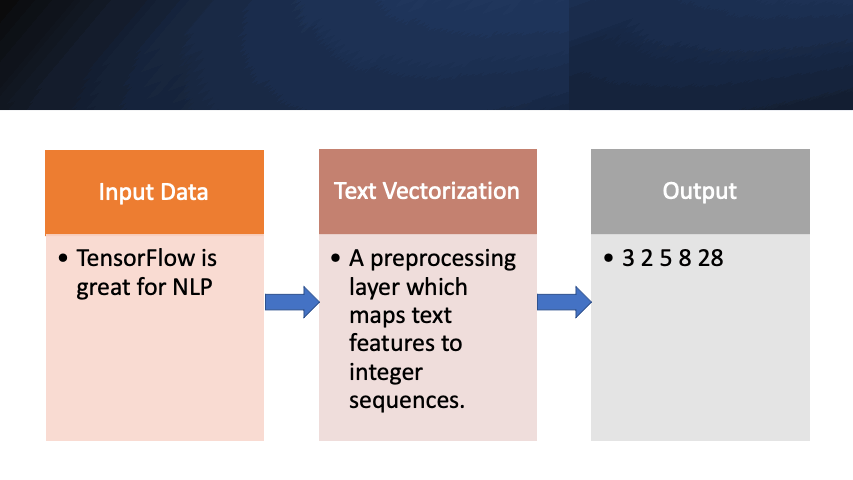


The `TextVectorization` layer also provides options for customizing the preprocessing step before vectorizing the text. These options include removing punctuation, converting all letters to lowercase, filtering out stopwords, and more.

Some of the parameters for the `TextVectorization` layer include:

* `max_tokens`: The maximum number of tokens to generate when tokenizing text. This represents the maximum size of the vocabulary.
* `output_mode`: How the output should be returned.
* `standardize`: Whether to apply standardization techniques (such as converting to lowercase) to the input data.
* `output_sequence_length`: The desired length of each sequence after tokenizing and preprocessing is completed.

* The `TextVectorization` layer tokenizes the text data, standardizes it (e.g., lowercasing and removing punctuation), and then builds a vocabulary by selecting the most frequent words up to the specified `max_tokens` parameter.
* This vocabulary is used to map each unique token (word, subword, or character) to a corresponding integer ID. This mapping allows the `TextVectorization` layer to convert input text into integer-encoded sequences when it processes new data.

In [ ]:
max_tokens = 20000
output_sequence_length = 256

vectorizer_layer = tf.keras.layers.TextVectorization(max_tokens=max_tokens, output_sequence_length=output_sequence_length,
                                                     output_mode='int', standardize='lower')

# output_mode='int': output_mode set to output integer indices
# standardize='lower': to convert all text to lowercase

* After creating the layer, we call the `adapt()` method on the `TextVectorization` object and pass it our training text corpus. When we do this, the layer analyzes the provided text data and builds an internal vocabulary based on the text.
* The `adapt()` method essentially "fits" the TextVectorization layer to the given data. This allows it to learn the statistical properties of the text corpus, such as word frequencies and the overall distribution of words.

In [ ]:
vectorizer_layer.adapt(X_train)

* The `output_sequence_length` parameter of the `TextVectorization` layer plays an important role in the text preprocessing pipeline. After the layer tokenizes and integer-encodes the input text based on the vocabulary built during the call to the `adapt()` method, it ensures that the output sequences have a consistent length by using the output_sequence_length parameter.

* Here's how it works:

 * If a tokenized input sequence has fewer tokens than the specified `output_sequence_length`, the layer pads the sequence with zeros at the end until it reaches the desired length. This is called **zero-padding** and ensures that shorter sequences match the expected input size for the neural network.

 * If a tokenized input sequence has more tokens than the specified `output_sequence_length`, the layer truncates the sequence, removing tokens from the end until it reaches the desired length. This is called **truncation** and ensures that longer sequences do not exceed the expected input size for the neural network.

* By setting the `output_sequence_length` parameter, we standardize the size of the input data fed into the neural network. This consistency is essential for training deep learning models because it ensures that the input tensors have uniform shapes across all samples, allowing for efficient batch processing during training and inference.

* The code below creates an Input layer with a shape of (1,) and the data type set to `tf.string`. This shape is used to indicate that each instance in the training data contains a single string input.

* The data type `tf.string` ensures that the input layer is designed to accept text data represented as strings. This allows the model to process the raw text data correctly and pass it to the subsequent layers.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, layers

model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))

After adding the input layer, we'll incorporate the `vectorizer_layer`. Next, we'll add a fully connected hidden layer. Finally, we'll append a dense layer with one output neuron and a `sigmoid` activation function. This will provide an output between 0 or 1 based on the prediction.

In [ ]:
model.add(vectorizer_layer)   # the inputs now are just tokens (and not embeddings i.e, 768-dim tensor)
model.add(layers.Dense(16))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Once the model is assembled, we compile it by specifying a loss function and an optimizer for training
opt = tf.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
157/157 [==============================] - 2s 4ms/step - loss: 1509.9407 - accuracy: 0.4902
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 1503.0110 - accuracy: 0.5068
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 3799.6001 - accuracy: 0.4946
Epoch 4/10
157/157 [==============================] - 1s 3ms/step - loss: 5634.8687 - accuracy: 0.5004
Epoch 5/10
157/157 [==============================] - 1s 4ms/step - loss: 6146.0562 - accuracy: 0.5120
Epoch 6/10
157/157 [==============================] - 1s 4ms/step - loss: 3854.5789 - accuracy: 0.5058
Epoch 7/10
157/157 [==============================] - 1s 4ms/step - loss: 3592.1035 - accuracy: 0.5148
Epoch 8/10
157/157 [==============================] - 1s 4ms/step - loss: 2785.9460 - accuracy: 0.5070
Epoch 9/10
157/157 [==============================] - 1s 4ms/step - loss: 2996.8069 - accuracy: 0.5042
Epoch 10/10
157/157 [==============================] - 1s 4ms/step - loss

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

157/157 [==============================] - 1s 3ms/step - loss: 1884.6234 - accuracy: 0.4950
0.4950000047683716


* We get a test accuracy of 50%. To improve our model's predictive power beyond a random guess, we'll explore creating an embedding layer in TensorFlow.

* Using an embedding layer can enhance a model's ability to recognize patterns in large amounts of unlabeled data by learning the relationships and meanings of different words.

### Word Embeddings

* Word embeddings are vector representations of words used in NLP. Each word is **represented by a fixed-length vector of numbers**, with the values capturing meaningful relationships between words.

* Word embeddings help identify semantic relationships and concepts among words, which can be utilized for downstream tasks such as text classification, sentiment analysis, and machine translation.



**TensorFlow's Embedding Layer**

* The Embedding layer in TensorFlow maps words to a vector of numbers. It takes a sequence of integer-encoded words as input and returns a matrix where each row contains the numerical representation (embedding) of the corresponding word.

* In the figure below, each token (word) is represented using a 4-dimensional tensor.

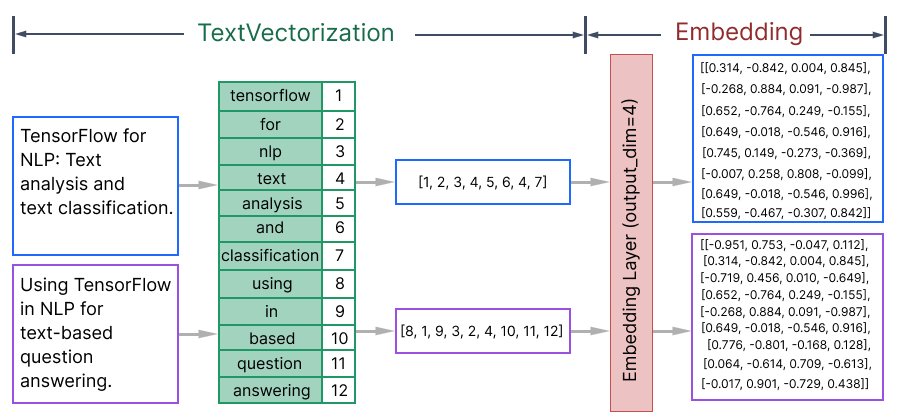


* This numerical representation can be used in downstream models, such as neural networks, to better capture semantic relationships between words.

* To instantiate an embedding layer in TensorFlow, we use the `tf.keras.layers.Embedding` class. The three main parameters for an embedding layer are:

 * `input_dim`: size of our vocabulary
 * `output_dim`: dimension of the dense embedding
 * `input_length`: length of input sequences the layer receives

* To ensure that the Embedding layer works correctly with the output of the `TextVectorization` layer we created previously, we should set the **`input_dim` equal to the `max_tokens`** value used for the `TextVectorization` layer. This way, the Embedding layer will be able to handle the integer indices generated by the `TextVectorization` layer for all tokens in the vocabulary.

* The `output_dim` parameter specifies the number of dimensions in the output embedding vectors, which represent the words in the input text. These vectors are dense representations of the words, and the `output_dim` determines the size of this dense representation. We can **choose the value of `output_dim` based on the complexity of our problem and the size of our dataset**. A larger value may capture more detailed semantic information about the words, but it can also increase the number of model parameters and the computational requirements for training the model. In the example image above, this value was set to 4.

* The `input_length` parameter in the Embedding layer specifies the expected length of the input sequences that the layer will receive. This parameter **should match the `output_sequence_length` of the `TextVectorization` layer to ensure that the data being fed into the embedding layer has the appropriate shape**. If there is a mismatch between these two lengths, it can lead to errors or incorrect behavior during model training.

* In addition to integrating the embedding layer into our model, we're also going to modify some arguments and add one new argument when instantiating our `TextVectorization` layer. The new argument we'll add to our `TextVectorization` layer is **ngram**

* n n-gram is a contiguous sequence of n words or tokens from a given text or document. N-grams are used in NLP and text analysis to model and capture the context and relationships between words in a text. They help in identifying patterns and predicting the next word or sequence of words, which is particularly useful for applications such as language modeling, text classification, and information retrieval.

* For example, consider the sentence: "I love natural language processing."

 * When ngrams=1 (unigram), the n-grams are individual words:
`["i", "love", "natural", "language", "processing"]`
 * When ngrams=2 (bigram), the n-grams are pairs of consecutive words:
`["i love", "love natural", "natural language", "language processing"]`
 * When ngrams=3 (trigram), the n-grams are sequences of three consecutive words:
`["i love natural", "love natural language", "natural language processing"]`

* As the value of n increases, n-grams capture more context and the relationships between words, but the number of unique n-grams also increases, which can lead to a larger and more complex feature space. We can also **use a tuple to set the value for ngrams to set a range of n-grams we would like to generate**.

* For example, when ngrams=(1, 3), the TextVectorization layer will generate the following tokenized text (assuming punctuation has been removed and made lowercase):

 * Unigrams: `['i', 'love', 'natural', 'language', 'processing']`
 * Bigrams: `['i love', 'love natural', 'natural language', 'language processing']`
 * Trigrams: `['i love natural', 'love natural language', 'natural language processing']`

 * The combined output will include all unigrams, bigrams, and trigrams:

`['i', 'love', 'natural', 'language', 'processing', 'i love', 'love natural', 'natural language', 'language processing', 'i love natural', 'love natural language', 'natural language processing']`

In [ ]:
max_tokens = 20000
output_sequence_length = 256

vectorizer_layer = tf.keras.layers.TextVectorization(max_tokens=max_tokens, output_sequence_length=output_sequence_length,
                                                     output_mode='int', standardize='lower', ngrams=(1,2))

vectorizer_layer.adapt(X_train)

In [ ]:
## from the TextVectorizer used previously
# max_tokens = 20000
# output_sequence_length = 256

embedding_layer = tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_length=256)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, layers

model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorizer_layer)                       # the vectorizer layer converts the text data into word encodings ('int' type)
model.add(embedding_layer)                        # the embedding layer converts the encoded words into multi-dimensional tensor embeddings
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
157/157 [==============================] - 9s 49ms/step - loss: 0.6891 - accuracy: 0.5279
Epoch 2/10
157/157 [==============================] - 7s 46ms/step - loss: 0.6816 - accuracy: 0.5420
Epoch 3/10
157/157 [==============================] - 10s 67ms/step - loss: 0.6791 - accuracy: 0.5415
Epoch 4/10
157/157 [==============================] - 10s 66ms/step - loss: 0.6770 - accuracy: 0.5498
Epoch 5/10
157/157 [==============================] - 9s 58ms/step - loss: 0.6760 - accuracy: 0.5515
Epoch 6/10
157/157 [==============================] - 12s 78ms/step - loss: 0.6757 - accuracy: 0.5518
Epoch 7/10
157/157 [==============================] - 8s 50ms/step - loss: 0.6759 - accuracy: 0.5508
Epoch 8/10
157/157 [==============================] - 7s 47ms/step - loss: 0.6748 - accuracy: 0.5521
Epoch 9/10
157/157 [==============================] - 8s 51ms/step - loss: 0.6750 - accuracy: 0.5526
Epoch 10/10
157/157 [==============================] - 1s 8ms/step - loss: 0.6919 - accu

We achieved an accuracy of:

* 51% on train data and 50% on test data for the model with just a text vectorization layer.

* 55% on train data and 53% on test data for the model with text vectorization and embedding layers.

This suggests that the embedding layer contributes positively to the model's performance.

## Multi-Layer Dense Models

* Building multilayer deep neural networks capable of producing reliable predictions requires a lot of experimentation.

* As we'll see, not all of our experiments will produce a positive result. This is a humbling reminder that building these models is an iterative process and **experimentation is highly encouraged**.

* **Building deep neural networks is more of an art than it is a science.**

**Shallow Network**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding


imdb_data = tfds.load(name="imdb_reviews", split="train")
imdb_df = tfds.as_dataframe(imdb_data)
imdb_df['text'] = imdb_df['text'].str.decode('utf-8')
imdb_sample = imdb_df.sample(frac=0.2, random_state=100)

imdb_test = tfds.load(name="imdb_reviews", split="test")
imdb_test_df = tfds.as_dataframe(imdb_test)
imdb_test_df['text'] = imdb_test_df['text'].str.decode('utf-8')
imdb_test_sample = imdb_test_df.sample(frac=0.2, random_state=100)

X_train = imdb_sample['text']
y_train = imdb_sample['label']
X_test = imdb_test_sample['text']
y_test = imdb_test_sample['label']

max_tokens = 7500
output_sequence_length = 128
output_dim = 128

vectorizer_layer = TextVectorization(max_tokens=max_tokens,
                                     output_mode='int',
                                     standardize='lower_and_strip_punctuation',
                                     ngrams=(1, 2),
                                     output_sequence_length=output_sequence_length)

vectorizer_layer.adapt(X_train)

embedding_layer = Embedding(input_dim=max_tokens,
                            output_dim=output_dim,
                            input_length=output_sequence_length)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.CBOXNP_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.CBOXNP_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.CBOXNP_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorizer_layer)
model.add(embedding_layer)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
157/157 [==============================] - 6s 29ms/step - loss: 0.6878 - accuracy: 0.5318
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 0.6815 - accuracy: 0.5484
Epoch 3/10
157/157 [==============================] - 4s 24ms/step - loss: 0.6803 - accuracy: 0.5508
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.6798 - accuracy: 0.5504
Epoch 5/10
157/157 [==============================] - 5s 33ms/step - loss: 0.6786 - accuracy: 0.5535
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.6783 - accuracy: 0.5540
Epoch 7/10
157/157 [==============================] - 3s 19ms/step - loss: 0.6774 - accuracy: 0.5550
Epoch 8/10
157/157 [==============================] - 4s 27ms/step - loss: 0.6775 - accuracy: 0.5558
Epoch 9/10
157/157 [==============================] - 3s 20ms/step - loss: 0.6770 - accuracy: 0.5555
Epoch 10/10
157/157 [==============================] - 1s 7ms/step - loss: 0.6885 - accurac

**Deep Network with 5 Dense Layers**

In [ ]:
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorizer_layer)
model.add(embedding_layer)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
157/157 [==============================] - 9s 46ms/step - loss: 0.6844 - accuracy: 0.5340
Epoch 2/10
157/157 [==============================] - 6s 35ms/step - loss: 0.6790 - accuracy: 0.5496
Epoch 3/10
157/157 [==============================] - 7s 45ms/step - loss: 0.6775 - accuracy: 0.5542
Epoch 4/10
157/157 [==============================] - 6s 36ms/step - loss: 0.6775 - accuracy: 0.5556
Epoch 5/10
157/157 [==============================] - 7s 45ms/step - loss: 0.6768 - accuracy: 0.5567
Epoch 6/10
157/157 [==============================] - 6s 36ms/step - loss: 0.6768 - accuracy: 0.5579
Epoch 7/10
157/157 [==============================] - 6s 41ms/step - loss: 0.6778 - accuracy: 0.5562
Epoch 8/10
157/157 [==============================] - 6s 41ms/step - loss: 0.6760 - accuracy: 0.5580
Epoch 9/10
157/157 [==============================] - 9s 54ms/step - loss: 0.6774 - accuracy: 0.5577
Epoch 10/10
157/157 [==============================] - 3s 14ms/step - loss: 0.6905 - accura

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 128)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 128, 128)          960000    
                                                                 
 dense_26 (Dense)            (None, 128, 128)          16512     
                                                                 
 dense_27 (Dense)            (None, 128, 64)           8256      
                                                                 
 dense_28 (Dense)            (None, 128, 32)           2080      
                                                                 
 dense_29 (Dense)            (None, 128, 16)           528       
                                                      

Note it is the last dimension that decreases... it is the embeddings that change and not the words?

The results haven't changed much (probably due to low data size hence lot of parameters; overfitting). We'll be adding `GlobalAveragePooling1D` following the embedding layer now...

### GlobalAveragePooling1D

* The `GlobalAveragePooling1D` layer performs a pooling operation, computing the average of all input values across each spatial dimension.
* This amazing layer helps standardize our data by smoothing out any noise or sneaky outliers hiding in our dataset.
* The outcome? Our model gives us a more reliable and meaningful snapshot of our data while reducing its complexity. This makes our model learn faster and better.

In [ ]:
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorizer_layer)
model.add(embedding_layer)
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
157/157 [==============================] - 5s 23ms/step - loss: 0.4214 - accuracy: 0.8502
Epoch 2/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2799 - accuracy: 0.9028
Epoch 3/10
157/157 [==============================] - 5s 29ms/step - loss: 0.2008 - accuracy: 0.9332
Epoch 4/10
157/157 [==============================] - 3s 19ms/step - loss: 0.1848 - accuracy: 0.9374
Epoch 5/10
157/157 [==============================] - 3s 19ms/step - loss: 0.1261 - accuracy: 0.9636
Epoch 6/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1135 - accuracy: 0.9658
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1072 - accuracy: 0.9710
Epoch 8/10
157/157 [==============================] - 3s 19ms/step - loss: 0.1006 - accuracy: 0.9720
Epoch 9/10
157/157 [==============================] - 3s 19ms/step - loss: 0.1000 - accuracy: 0.9734
Epoch 10/10
157/157 [==============================] - 1s 7ms/step - loss: 1.8305 - accurac

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 128)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 128, 128)          960000    
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)               

The embedding along each dimension for every word is averaged and pooled as infered from the the model summary??

The performance of the model increased from 55% to 76% on the test dataset just with the addition of `GlobalAveragePooling1D` layer. We'll try improving on it further with Hyper Parameter Tuning.

### HPT: The Fine Art of Optimization

* Hyperparameter tuning is like a treasure hunt, where we search for the perfect combination of model parameters to maximize its performance. By adjusting these parameters, we can influence how an algorithm learns and performs, unlocking its full potential. Hyperparameter tuning is the key that helps us unlock the full power of our model, ensuring we make the most out of every parameter.

* Below are some common hyperparameters in a deep neural network for text classification:

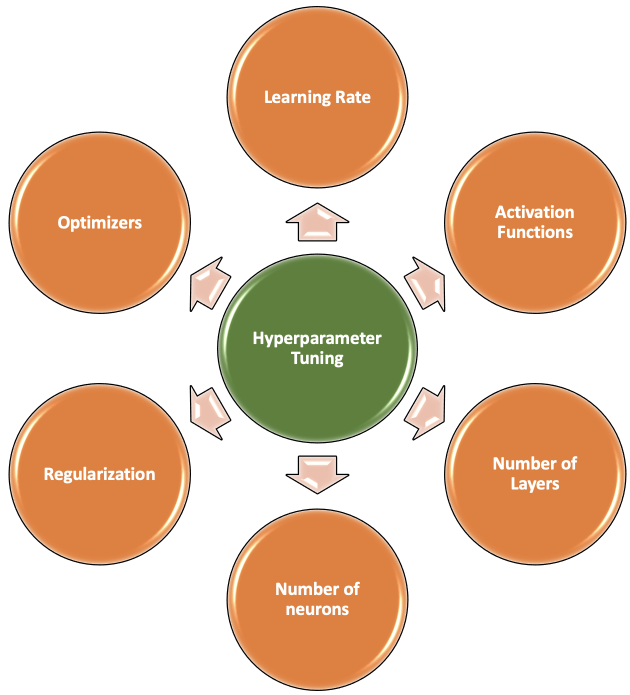


#### The Learning Rate Balancing Act

* The learning rate for the optimizer is a key player in deep neural network performance. It dictates the speed of training and convergence.

* A **high learning rate** can **cause the model to converge too quickly to a suboptimal solutio**n, skipping over better or more nuanced solutions. This is known as underfitting. The model doesn't learn enough from the data, and thus it doesn't perform well.

* On the other hand, a **low learning rate** causes the model to learn slowly, taking a small step in each iteration of the training process. While this can help the model to find a good solution without skipping over it, it can also **cause the model to get stuck in local minima and overfit to the training data**. This is because a low learning rate might allow the model to tweak and adapt its parameters to the training data so closely that it performs poorly on unseen data. Overfitting is a situation where the model performs well on the training data but poorly on the validation/test data.

* While the learning rate can influence the model's tendency to overfit or underfit the data, other factors, such as model architecture, regularization techniques, and the amount of training data, also play a significant role in determining the model's performance and its ability to generalize.

In [ ]:
# model with an higher accuracy rate of 0.1

model_inc_learning_rate = Sequential()
model_inc_learning_rate.add(Input(shape=(1,), dtype=tf.string))
model_inc_learning_rate.add(vectorizer_layer)
model_inc_learning_rate.add(embedding_layer)
model_inc_learning_rate.add(layers.GlobalAveragePooling1D())
model_inc_learning_rate.add(layers.Dense(128, activation='relu'))
model_inc_learning_rate.add(layers.Dense(64, activation='relu'))
model_inc_learning_rate.add(layers.Dense(32, activation='relu'))
model_inc_learning_rate.add(layers.Dense(16, activation='relu'))
model_inc_learning_rate.add(layers.Dense(8, activation='relu'))
model_inc_learning_rate.add(layers.Dense(1, activation='sigmoid'))

model_inc_learning_rate.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

model_inc_learning_rate.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model_inc_learning_rate.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
157/157 [==============================] - 8s 35ms/step - loss: 0.7215 - accuracy: 0.4920
Epoch 2/10
157/157 [==============================] - 5s 30ms/step - loss: 0.6950 - accuracy: 0.5050
Epoch 3/10
157/157 [==============================] - 6s 38ms/step - loss: 0.6938 - accuracy: 0.5174
Epoch 4/10
157/157 [==============================] - 3s 21ms/step - loss: 0.6959 - accuracy: 0.4942
Epoch 5/10
157/157 [==============================] - 3s 19ms/step - loss: 0.6958 - accuracy: 0.5014
Epoch 6/10
157/157 [==============================] - 3s 19ms/step - loss: 0.6945 - accuracy: 0.4978
Epoch 7/10
157/157 [==============================] - 4s 25ms/step - loss: 0.6950 - accuracy: 0.5122
Epoch 8/10
157/157 [==============================] - 4s 23ms/step - loss: 0.6955 - accuracy: 0.4922
Epoch 9/10
157/157 [==============================] - 3s 19ms/step - loss: 0.6938 - accuracy: 0.5074
Epoch 10/10
157/157 [==============================] - 5s 17ms/step - loss: 0.6933 - accura

In [ ]:
# model with an lower accuracy rate of 0.001

model_dec_learning_rate = Sequential()
model_dec_learning_rate.add(Input(shape=(1,), dtype=tf.string))
model_dec_learning_rate.add(vectorizer_layer)
model_dec_learning_rate.add(embedding_layer)
model_dec_learning_rate.add(layers.GlobalAveragePooling1D())
model_dec_learning_rate.add(layers.Dense(128, activation='relu'))
model_dec_learning_rate.add(layers.Dense(64, activation='relu'))
model_dec_learning_rate.add(layers.Dense(32, activation='relu'))
model_dec_learning_rate.add(layers.Dense(16, activation='relu'))
model_dec_learning_rate.add(layers.Dense(8, activation='relu'))
model_dec_learning_rate.add(layers.Dense(1, activation='sigmoid'))

model_dec_learning_rate.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_dec_learning_rate.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model_dec_learning_rate.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
157/157 [==============================] - 9s 35ms/step - loss: 0.4377 - accuracy: 0.8186
Epoch 2/10
157/157 [==============================] - 6s 38ms/step - loss: 0.1674 - accuracy: 0.9436
Epoch 3/10
157/157 [==============================] - 5s 34ms/step - loss: 0.1241 - accuracy: 0.9606
Epoch 4/10
157/157 [==============================] - 6s 39ms/step - loss: 0.1252 - accuracy: 0.9616
Epoch 5/10
157/157 [==============================] - 5s 31ms/step - loss: 0.0887 - accuracy: 0.9752
Epoch 6/10
157/157 [==============================] - 5s 34ms/step - loss: 0.0723 - accuracy: 0.9820
Epoch 7/10
157/157 [==============================] - 6s 37ms/step - loss: 0.0659 - accuracy: 0.9852
Epoch 8/10
157/157 [==============================] - 4s 25ms/step - loss: 0.0798 - accuracy: 0.9770
Epoch 9/10
157/157 [==============================] - 3s 19ms/step - loss: 0.0564 - accuracy: 0.9860
Epoch 10/10
157/157 [==============================] - 1s 7ms/step - loss: 0.8941 - accurac

Of the 3 learning rates experimented with on the model with `GlobalAveragePolling1D`, the accuracies are:
* lr=0.1   -> 49.8%
* lr=0.01  -> 76.2%
* lr=0.001 -> 76.7%

**Hence going with `learning_rate=0.001` moving forward...**

#### Choice of Activation Function

* Activation functions breathe life into our network by incorporating non-linear transformations, enabling it to grasp complex relationships.

* We've been using the `relu()` activation function, but there are alternative options worth considering, such as the `elu()` function.

* The Exponential Linear Unit (ELU) imparts non-linearity by applying an exponential function to negative inputs while keeping positive inputs unchanged, thereby enhancing the model's capacity to learn the nuanced relationship between input and output.

In [ ]:
# model with 'elu' activation instead of 'relu' activation in the dense layers

model_activation_function = Sequential()
model_activation_function.add(Input(shape=(1,), dtype=tf.string))
model_activation_function.add(vectorizer_layer)
model_activation_function.add(embedding_layer)
model_activation_function.add(layers.GlobalAveragePooling1D())
model_activation_function.add(layers.Dense(128, activation='elu'))
model_activation_function.add(layers.Dense(64, activation='elu'))
model_activation_function.add(layers.Dense(32, activation='elu'))
model_activation_function.add(layers.Dense(16, activation='elu'))
model_activation_function.add(layers.Dense(8, activation='elu'))
model_activation_function.add(layers.Dense(1, activation='sigmoid'))

model_activation_function.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_activation_function.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model_activation_function.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
157/157 [==============================] - 6s 20ms/step - loss: 0.2610 - accuracy: 0.8912
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0877 - accuracy: 0.9730
Epoch 3/10
157/157 [==============================] - 4s 24ms/step - loss: 0.0495 - accuracy: 0.9890
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.0475 - accuracy: 0.9892
Epoch 5/10
157/157 [==============================] - 3s 19ms/step - loss: 0.0472 - accuracy: 0.9884
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0448 - accuracy: 0.9878
Epoch 7/10
157/157 [==============================] - 4s 22ms/step - loss: 0.0537 - accuracy: 0.9828
Epoch 8/10
157/157 [==============================] - 4s 25ms/step - loss: 0.0365 - accuracy: 0.9920
Epoch 9/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0309 - accuracy: 0.9934
Epoch 10/10
157/157 [==============================] - 1s 7ms/step - loss: 1.2526 - accurac

**We got a marginally better performace of 76.9% using `elu` activation function; using this moving forward...**

#### Adding Dropout Layers

* Since our models are showing clear signs of overfitting, we should seriously consider implementing some regularization to address it.

* A Dropout layer is a smart regularization technique for neural networks that **helps to prevent overfitting**. It works by **randomly turning off (i.e., setting their weights to zero) random neurons during each training iteration**. This ingenious trick prevents the nodes from relying too heavily on any particular input feature and helps the model generalize better to unseen data points.

* Where rate is the percentage of random nodes to drop during each training iteration. It's not necessary to use the same rate for all the dropout layers in our model. In some cases, using different dropout rates for different layers can lead to better performance. For instance, we might want to use a higher dropout rate in the earlier layers of our model and a lower dropout rate in the later layers.

* Ultimately, the choice of dropout rate(s) depends on the specific problem and model architecture. It's often a good idea to experiment with different dropout rates and monitor the model's performance on both the training and test sets to find the best setting for each use case.

* Dropout is only applied during training, so it won't affect the model's performance during inference.

In [ ]:
model_optimizer_dropout = Sequential()
model_optimizer_dropout.add(Input(shape=(1,), dtype=tf.string))
model_optimizer_dropout.add(vectorizer_layer)
model_optimizer_dropout.add(embedding_layer)
model_optimizer_dropout.add(layers.GlobalAveragePooling1D())
model_optimizer_dropout.add(layers.Dense(128, activation='elu'))
model_optimizer_dropout.add(layers.Dropout(rate=0.6))                   # dropout layer with rate=0.6
model_optimizer_dropout.add(layers.Dense(64, activation='elu'))
model_optimizer_dropout.add(layers.Dropout(rate=0.5))                   # dropout layer with rate=0.5
model_optimizer_dropout.add(layers.Dense(32, activation='elu'))
model_optimizer_dropout.add(layers.Dense(16, activation='elu'))
model_optimizer_dropout.add(layers.Dense(8, activation='elu'))
model_optimizer_dropout.add(layers.Dense(1, activation='sigmoid'))

opt = tf.optimizers.RMSprop(learning_rate=0.001, rho=0.8, momentum=0.9) # using RMSProp optimizer instead of Adam here
model_optimizer_dropout.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model_optimizer_dropout.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model_optimizer_dropout.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
157/157 [==============================] - 6s 20ms/step - loss: 0.5023 - accuracy: 0.7248
Epoch 2/10
157/157 [==============================] - 3s 19ms/step - loss: 0.1608 - accuracy: 0.9500
Epoch 3/10
157/157 [==============================] - 4s 23ms/step - loss: 0.1401 - accuracy: 0.9570
Epoch 4/10
157/157 [==============================] - 3s 17ms/step - loss: 0.1130 - accuracy: 0.9698
Epoch 5/10
157/157 [==============================] - 3s 21ms/step - loss: 0.0924 - accuracy: 0.9762
Epoch 6/10
157/157 [==============================] - 3s 17ms/step - loss: 0.0778 - accuracy: 0.9802
Epoch 7/10
157/157 [==============================] - 4s 25ms/step - loss: 0.0845 - accuracy: 0.9760
Epoch 8/10
157/157 [==============================] - 3s 22ms/step - loss: 0.0666 - accuracy: 0.9860
Epoch 9/10
157/157 [==============================] - 3s 17ms/step - loss: 0.0583 - accuracy: 0.9854
Epoch 10/10
157/157 [==============================] - 2s 11ms/step - loss: 2.7847 - accura

The changes do not appear to have improved things compared to previous models, and sometimes, that's just how things go with experiments! However, one thing is clear: our models continue to overfit the data (this can be corrected using the rest of the 80% data ofcourse). Hence, trying **regularization** next...

#### Regularization

* Regularizers empower us to **add penalties to layer parameters during model optimization**. These penalties **join forces with the network's loss function, which is then optimized**.

* This penalty **discourages the model from assigning overly large weights to any particular feature**, helping it generalize better to new unseen data.

* TensorFlow provides a `Regularizer` class to implement regularization via the `kernel_regularizer` parameter that can be added to layers in model.

**L1 and L2 Regularization**

* The L1 (Lasso) and L2 (Ridge) are regularization techniques in the `tf.keras.regularizers` module that are used for **weight decay**. This involves **adding a penalty term to the loss function during the training process**. The penalty term is based on the magnitude of the model's weights, **encouraging the learning algorithm to find a solution with smaller weights**.

* L1 regularization **adds the sum** (`tf.reduce_sum()`) **of the absolute values of weights** (`abs(x)`) multiplied by the l1 regularization factor (sometimes called lambda or alpha) to the loss function during optimization.
* Here's how the L1 regularization penalty is calculated: `l1_loss = tf.reduce_sum(abs(x)) * l1`

* L2 regularization **adds the sum of the squares of weights** (x) multiplied by the l2 regularization factor to the loss function. These regularization techniques encourage the model to learn simpler and more general patterns in the data, helping to prevent overfitting.
* And the L2 regularization penalty uses this equation: `l2_loss = tf.reduce_sum(square(x)) * l2`

* The regularization term is typically a fraction of the weight's magnitude, ensuring that **larger weights are penalized more than smaller ones**. This helps prevent large weights from stealing the spotlight during the optimization process.

* The values for the parameters of the `kernel_regularizer` can be instances of L1 or L2 regularizers. We can also apply both penalties at the same time using L1L2. To apply L1, L2, or L1L2 regularizers to dense layers, use the example code below:

In [ ]:
from tensorflow.keras.regularizers import L1, L2, L1L2

tf.keras.layers.Dense(arg_1, arg_2,..., kernel_regularizer=L1(l1=l1))
tf.keras.layers.Dense(arg_1, arg_2,..., kernel_regularizer=L2(l2=l2))
tf.keras.layers.Dense(arg_1, arg_2,..., kernel_regularizer=L1L2(l1=l1, l2=l2))

In [ ]:
from tensorflow.keras.regularizers import L1, L2, L1L2

model_regularized = Sequential()
model_regularized.add(Input(shape=(1,), dtype=tf.string))
model_regularized.add(vectorizer_layer)
model_regularized.add(embedding_layer)
model_regularized.add(layers.GlobalAveragePooling1D())
model_regularized.add(layers.Dense(128, activation='elu',
                                   kernel_regularizer=L1(l1=0.00001)))                # L1 with reg_factor=0.00001
model_regularized.add(layers.Dropout(rate=0.6))                                       # dropout layer with rate=0.6
model_regularized.add(layers.Dense(64, activation='elu',
                                   kernel_regularizer=L1L2(l1=0.00001, l2=0.00001)))                # L1L2 with reg_factor=0.00001 for both
model_regularized.add(layers.Dropout(rate=0.5))                                       # dropout layer with rate=0.5
model_regularized.add(layers.Dense(32, activation='elu',
                                   kernel_regularizer=L2(l2=0.0005)))                               # L2 with reg_factor=0.0005
model_regularized.add(layers.Dense(16, activation='elu',
                                   kernel_regularizer=L2(l2=0.0005)))                               # L2 with reg_factor=0.0005
model_regularized.add(layers.Dense(8, activation='elu',
                                   kernel_regularizer=L2(l2=0.0005)))                               # L2 with reg_factor=0.0005                              # L2 with reg_factor=0.0005
model_regularized.add(layers.Dense(1, activation='sigmoid'))

opt = tf.optimizers.RMSprop(learning_rate=0.001, rho=0.8, momentum=0.9)               # using RMSProp optimizer instead of Adam here
model_regularized.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model_regularized.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model_regularized.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
157/157 [==============================] - 4s 18ms/step - loss: 0.2234 - accuracy: 0.9278
Epoch 2/10
157/157 [==============================] - 3s 18ms/step - loss: 0.0937 - accuracy: 0.9832
Epoch 3/10
157/157 [==============================] - 3s 19ms/step - loss: 0.0856 - accuracy: 0.9856
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 0.0762 - accuracy: 0.9896
Epoch 5/10
157/157 [==============================] - 3s 17ms/step - loss: 0.0705 - accuracy: 0.9906
Epoch 6/10
157/157 [==============================] - 4s 28ms/step - loss: 0.0603 - accuracy: 0.9920
Epoch 7/10
157/157 [==============================] - 7s 42ms/step - loss: 0.0621 - accuracy: 0.9902
Epoch 8/10
157/157 [==============================] - 5s 33ms/step - loss: 0.0471 - accuracy: 0.9942
Epoch 9/10
157/157 [==============================] - 5s 31ms/step - loss: 0.0526 - accuracy: 0.9936
Epoch 10/10
157/157 [==============================] - 1s 7ms/step - loss: 2.4083 - accurac

**Using the complete dataset:**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.regularizers import L1, L2, L1L2

imdb_data = tfds.load(name="imdb_reviews", split="train")
imdb_df = tfds.as_dataframe(imdb_data)
imdb_df['text'] = imdb_df['text'].str.decode('utf-8')

imdb_test = tfds.load(name="imdb_reviews", split="test")
imdb_test_df = tfds.as_dataframe(imdb_test)
imdb_test_df['text'] = imdb_test_df['text'].str.decode('utf-8')

X_train = imdb_df['text']
y_train = imdb_df['label']
X_test = imdb_test_df['text']
y_test = imdb_test_df['label']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.SYWC44_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.SYWC44_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.SYWC44_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
max_tokens = 7500
output_sequence_length = 128
output_dim = 128

vectorizer_layer = TextVectorization(max_tokens=max_tokens,
                                     output_mode='int',
                                     standardize='lower_and_strip_punctuation',
                                     ngrams=(1, 2),
                                     output_sequence_length=output_sequence_length)

vectorizer_layer.adapt(X_train)

embedding_layer = Embedding(input_dim=max_tokens,
                            output_dim=output_dim,
                            input_length=output_sequence_length)

In [ ]:
model_regularized = Sequential()
model_regularized.add(Input(shape=(1,), dtype=tf.string))
model_regularized.add(vectorizer_layer)
model_regularized.add(embedding_layer)
model_regularized.add(layers.GlobalAveragePooling1D())
model_regularized.add(layers.Dense(128, activation='elu',
                                   kernel_regularizer=L1(l1=0.00001)))                # L1 with reg_factor=0.00001
model_regularized.add(layers.Dropout(rate=0.6))                                       # dropout layer with rate=0.6
model_regularized.add(layers.Dense(64, activation='elu',
                                   kernel_regularizer=L1L2(l1=0.00001, l2=0.00001)))                # L1L2 with reg_factor=0.00001 for both
model_regularized.add(layers.Dropout(rate=0.5))                                       # dropout layer with rate=0.5
model_regularized.add(layers.Dense(32, activation='elu',
                                   kernel_regularizer=L2(l2=0.0005)))                               # L2 with reg_factor=0.0005
model_regularized.add(layers.Dense(16, activation='elu',
                                   kernel_regularizer=L2(l2=0.0005)))                               # L2 with reg_factor=0.0005
model_regularized.add(layers.Dense(8, activation='elu',
                                   kernel_regularizer=L2(l2=0.0005)))                               # L2 with reg_factor=0.0005                              # L2 with reg_factor=0.0005
model_regularized.add(layers.Dense(1, activation='sigmoid'))

opt = tf.optimizers.RMSprop(learning_rate=0.001, rho=0.8, momentum=0.9)               # using RMSProp optimizer instead of Adam here
model_regularized.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model_regularized.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model_regularized.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/10
782/782 [==============================] - 24s 22ms/step - loss: 0.4937 - accuracy: 0.7813
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 0.3962 - accuracy: 0.8474
Epoch 3/10
782/782 [==============================] - 8s 11ms/step - loss: 0.3700 - accuracy: 0.8598
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3514 - accuracy: 0.8671
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3455 - accuracy: 0.8719
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3405 - accuracy: 0.8726
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3366 - accuracy: 0.8760
Epoch 8/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3280 - accuracy: 0.8778
Epoch 9/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3263 - accuracy: 0.8819
Epoch 10/10
782/782 [==============================] - 5s 7ms/step - loss: 0.4214 - accuracy:

Using the complete dataset instead of 20% improved the accuracy from 76% to 83% !!

Comparison of the accuracies of different models on train & test dataset:

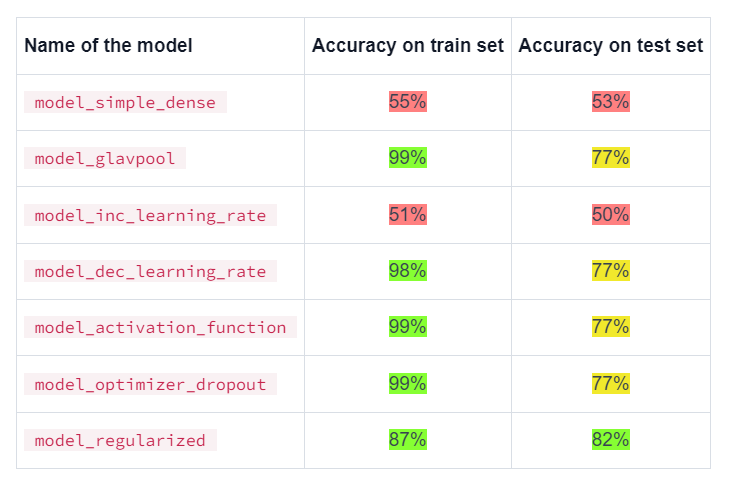

## Sequence modeling in NLP

### Simple LSTM

Sequence models use algorithms that consider the order of input data points. In other words, they take into account the sequence of words when predicting the output text. This makes sequence modeling ideal for tasks like speech recognition and machine translation, which require an understanding of longer sequences of data.

**The Anatomy of an LSTM Model**

* Like most neural networks, LSTM models consist of interconnected layers of neurons, referred to as cells. Each cell incorporates an input gate, an output gate, and a forget gate.

* The input gate determines which information to update, the forget gate decides which information to discard, and the output gate identifies which information to output. Here is a depiction of this concept:

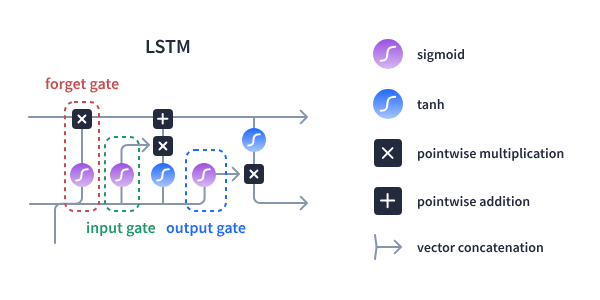

* In addition to an input gate, an output gate, and a forget gate, the LSTM architecture also contains a cell state and a hidden state. The **cell state serves as the memory of the cell**, while the **hidden state functions as the output of the cell**.

* LSTM has the parameter `units`- a positive integer that **represents the dimensionality of the output space**. In simpler terms, it sets the number of hidden units or "neurons" in the LSTM layer.

* **Each unit or neuron in an LSTM layer represents a memory cell that is capable of remembering a value over an arbitrary length of time**. This memory capability is what makes LSTM models particularly useful for sequence prediction problems, as they can "remember" important information from earlier in the sequence and use it to inform predictions later in the sequence.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.regularizers import L1, L2, L1L2

imdb_data = tfds.load(name="imdb_reviews", split="train")
imdb_df = tfds.as_dataframe(imdb_data)
imdb_df['text'] = imdb_df['text'].str.decode('utf-8')

imdb_test = tfds.load(name="imdb_reviews", split="test")
imdb_test_df = tfds.as_dataframe(imdb_test)
imdb_test_df['text'] = imdb_test_df['text'].str.decode('utf-8')

X_train = imdb_df['text']
y_train = imdb_df['label']
X_test = imdb_test_df['text']
y_test = imdb_test_df['label']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.X10ZUT_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.X10ZUT_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.X10ZUT_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
max_tokens = 20000
output_sequence_length = 256
output_dim = 128

vectorizer_layer = TextVectorization(max_tokens=max_tokens,
                                     output_mode='int',
                                     standardize='lower_and_strip_punctuation',
                                     ngrams=1,
                                     output_sequence_length=output_sequence_length)

vectorizer_layer.adapt(X_train)

embedding_layer = Embedding(input_dim=max_tokens,
                            output_dim=output_dim,
                            input_length=output_sequence_length)

In [ ]:
simple_lstm = Sequential()
simple_lstm.add(Input(shape=(1,), dtype=tf.string))
simple_lstm.add(vectorizer_layer)
simple_lstm.add(embedding_layer)
simple_lstm.add(layers.LSTM(128))
simple_lstm.add(layers.Dense(64, activation='relu'))
simple_lstm.add(layers.Dense(1, activation='sigmoid'))
simple_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 256)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 256, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2699905 (10.30 MB)
Trainable params: 2699905 (10.30 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
simple_lstm.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
simple_lstm.fit(X_train, y_train, epochs=5)
test_loss, test_acc = simple_lstm.evaluate(X_test, y_test)
print(test_acc)

Epoch 1/5
782/782 [==============================] - 54s 59ms/step - loss: 0.6842 - accuracy: 0.5396
Epoch 2/5
782/782 [==============================] - 20s 26ms/step - loss: 0.6291 - accuracy: 0.6105
Epoch 3/5
782/782 [==============================] - 16s 21ms/step - loss: 0.5650 - accuracy: 0.6882
Epoch 4/5
782/782 [==============================] - 15s 19ms/step - loss: 0.2936 - accuracy: 0.8852
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.3663 - accuracy: 0.8584
0.8583599925041199


Using a simple sequential model gets a performance of 85.8% without any HPT !!

### Bi-LSTM

* A Bidirectional LSTM extends the functionality of a simple LSTM by processing input sequences in both forward and backward directions. This architecture allows the network to capture not just the context leading up to a word, but also the context following it.

* Bidirectional LSTMs retain a memory of both future and past context while processing each token in a sequence, enabling them to make more accurate predictions for text classification tasks.

In [ ]:
sl_bi_lstm = Sequential()
sl_bi_lstm.add(Input(shape=(1,), dtype=tf.string))
sl_bi_lstm.add(vectorizer_layer)
sl_bi_lstm.add(embedding_layer)
sl_bi_lstm.add(layers.Bidirectional(layers.LSTM(128)))
sl_bi_lstm.add(layers.Dense(64, activation='relu', kernel_regularizer=L1L2(l1=0.005, l2=0.005)))
sl_bi_lstm.add(layers.Dense(32, activation='relu', kernel_regularizer=L2(l2=0.005)))
sl_bi_lstm.add(layers.Dense(16, activation='relu', kernel_regularizer=L2(l2=0.01)))
sl_bi_lstm.add(layers.Dense(1, activation='sigmoid'))
sl_bi_lstm.summary()

sl_bi_lstm.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
sl_bi_lstm.fit(X_train, y_train, epochs=3)

test_loss, test_acc = sl_bi_lstm.evaluate(X_test, y_test)
print(test_acc)

### Multilayer BiLSTM

* Multilayer Bidirectional LSTMs are an extension of single-layer Bidirectional LSTMs. The key difference lies in the presence of multiple LSTM layers, enabling the model to gather more context for pattern recognition and prediction making.

* With multiple LSTM layers, each layer can focus on different aspects of the data and pass on relevant information to the next layer.

* We can stack as many LSTM layers as we want in our Sequential model. We just need to ensure that the **`return_sequences` flag is set to `True` inside each LSTM layer, except for our last LSTM layer**.



**`return_sequences` Argument**

Imagine LSTM layers are like a bunch of time-traveling detectives, each looking at a piece of evidence (i.e., data points in a sequence). Now, these detectives can share their findings in two ways, and this is where `return_sequences` comes into play:

* `return_sequences`=`False` (default setting): This is like each detective **passing only their LAST piece** of evidence to their boss. So, if our detective LSTM layer was investigating a sequence of 10 data points, it would only report back on the 10th one. The boss (next layer) then only gets a snapshot of the final moment. This works perfectly if the boss is a Dense layer, as they love these kinds of brief reports!

* `return_sequences`=`True`: Here's where things get exciting! This is like every detective **reporting EVERY piece** of evidence they find, one by one. So, if our detective LSTM layer was investigating the same sequence of 10 data points, it would report back on all 10. The boss now gets a thrilling play-by-play of the investigation. This is perfect if the boss is another LSTM layer, as they love a good story!

Since our models are showing clear signs of overfitting, we'll try reducing the model complexity while increasing the penalty imposed by the kernel regularizer to see if that helps the model to generalize.

In [ ]:
ml_bi_lstm = Sequential()
ml_bi_lstm.add(Input(shape=(1,), dtype=tf.string))
ml_bi_lstm.add(vectorizer_layer)
ml_bi_lstm.add(embedding_layer)
ml_bi_lstm.add(layers.Bidirectional(layers.LSTM(4, return_sequences=True)))
ml_bi_lstm.add(layers.Bidirectional(layers.LSTM(4, return_sequences=True)))
ml_bi_lstm.add(layers.Bidirectional(layers.LSTM(4)))
ml_bi_lstm.add(layers.Dense(8, activation='elu', kernel_regularizer=L1L2(l1=0.1, l2=0.1)))
ml_bi_lstm.add(layers.Dense(8, activation='elu', kernel_regularizer=L2(l2=0.1)))
ml_bi_lstm.add(layers.Dense(8, activation='elu', kernel_regularizer=L2(l2=0.05)))
ml_bi_lstm.add(layers.Dense(1, activation='sigmoid'))
ml_bi_lstm.summary()

opt = tf.optimizers.RMSprop(learning_rate=0.0001, rho=0.8, momentum=0.9)
ml_bi_lstm.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
ml_bi_lstm.fit(X_train, y_train, epochs=3)

test_loss, test_acc = ml_bi_lstm.evaluate(X_test, y_test)
print(test_acc)

### HPT - Merge Mode

* The `merge_mode` argument of the `tf.keras.layers.Bidirectional` layer is like a master chef, deciding how best to blend the ingredients into a final culinary masterpiece. It controls how the outputs of our Bidirectional LSTM — coming from both forward and backward directions — join forces. This argument determines the type of fusion that occurs between these two sequences.

* The `merge_mode` argument can take one of four values, each leading to a different merge operation:

 * `sum`: The output from each direction is added together

 * `mul`: The output from each direction is multiplied together, taking teamwork to a whole new level.

 * `concat`: The output from each direction is concatenated, forming a sort of super sequence.

 * `ave`: The output from each direction is averaged together, because why play favorites?

Experimenting with 3 models with `merge_mode`=`sum`, `ave` and `mul`...

In [ ]:
# merge_mode = sum

ml_bi_lstm_sum = Sequential()
ml_bi_lstm_sum.add(Input(shape=(1,), dtype=tf.string))
ml_bi_lstm_sum.add(vectorizer_layer)
ml_bi_lstm_sum.add(embedding_layer)
ml_bi_lstm_sum.add(layers.Bidirectional(layers.LSTM(8, merge_mode='sum', return_sequences=True)))
ml_bi_lstm_sum.add(layers.Bidirectional(layers.LSTM(4, merge_mode='sum')))
ml_bi_lstm_sum.add(layers.Dense(16, activation='relu'))
ml_bi_lstm_sum.add(layers.Dropout(rate=0.5))
ml_bi_lstm_sum.add(layers.Dense(1, activation='sigmoid'))
ml_bi_lstm_sum.summary()

ml_bi_lstm_sum.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
ml_bi_lstm_sum.fit(X_train, y_train, epochs=3)

test_loss, test_acc = ml_bi_lstm_sum.evaluate(X_test, y_test)
print(test_acc)

In [ ]:
# merge_mode = ave

ml_bi_lstm_ave = Sequential()
ml_bi_lstm_ave.add(Input(shape=(1,), dtype=tf.string))
ml_bi_lstm_ave.add(vectorizer_layer)
ml_bi_lstm_ave.add(embedding_layer)
ml_bi_lstm_ave.add(layers.Bidirectional(layers.LSTM(8, merge_mode='ave', return_sequences=True)))
ml_bi_lstm_ave.add(layers.Bidirectional(layers.LSTM(4, merge_mode='ave')))
ml_bi_lstm_ave.add(layers.Dense(16, activation='relu'))
ml_bi_lstm_ave.add(layers.Dropout(rate=0.5))
ml_bi_lstm_ave.add(layers.Dense(1, activation='sigmoid'))
ml_bi_lstm_ave.summary()

ml_bi_lstm_ave.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
ml_bi_lstm_ave.fit(X_train, y_train, epochs=3)

test_loss, test_acc = ml_bi_lstm_ave.evaluate(X_test, y_test)
print(test_acc)

In [ ]:
# merge_mode = mul

ml_bi_lstm_mul = Sequential()
ml_bi_lstm_mul.add(Input(shape=(1,), dtype=tf.string))
ml_bi_lstm_mul.add(vectorizer_layer)
ml_bi_lstm_mul.add(embedding_layer)
ml_bi_lstm_mul.add(layers.Bidirectional(layers.LSTM(8, merge_mode='mul', return_sequences=True)))
ml_bi_lstm_mul.add(layers.Bidirectional(layers.LSTM(4, merge_mode='mul')))
ml_bi_lstm_mul.add(layers.Dense(16, activation='relu'))
ml_bi_lstm_mul.add(layers.Dropout(rate=0.5))
ml_bi_lstm_mul.add(layers.Dense(1, activation='sigmoid'))
ml_bi_lstm_mul.summary()

ml_bi_lstm_mul.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
ml_bi_lstm_mul.fit(X_train, y_train, epochs=3)

test_loss, test_acc = ml_bi_lstm_mul.evaluate(X_test, y_test)
print(test_acc)

The results of the different sequence models are as expected:

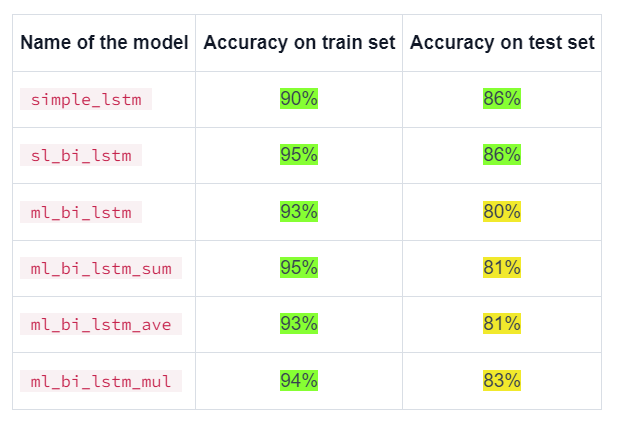

## Transformers

### Architecture for classification

Transformers are a type of artificial neural network that have gained significant attention in the field of NLP. They were first introduced by Google researchers in 2017, and have quickly become a popular choice for a variety of NLP tasks, including text classification, language translation, and text generation.

**Architecture of Transformers in Text Classification**

* `Text`: This is the raw input data that we aim to classify into predetermined categories or labels.

* `Tokenizer`: It transforms the input text into a sequence of tokens, breaking it down into individual words or subwords.

* `Input IDs`: The tokens are then converted into their numerical representations, or input_ids, derived from a pre-established vocabulary. Each token is associated with a specific Input ID.

* `Attention Mask`: This is a binary mask specifying which tokens should be focused on and which should be disregarded. This enables the model to concentrate on the relevant sections of the input text.

* `Encoder`: This is the heart of the transformer architecture, comprising multiple layers with self-attention mechanisms and feed-forward neural networks. The encoder processes the input IDs and attention mask, capturing the contextual dependencies to generate contextualized representations for each token.

* `Classification`: The encoder's output is used for classification, where the model learns to associate the contextualized representations to predefined labels or categories.

* `Output`: This is the final output of the text classification model, representing the predicted label or category for the input text.

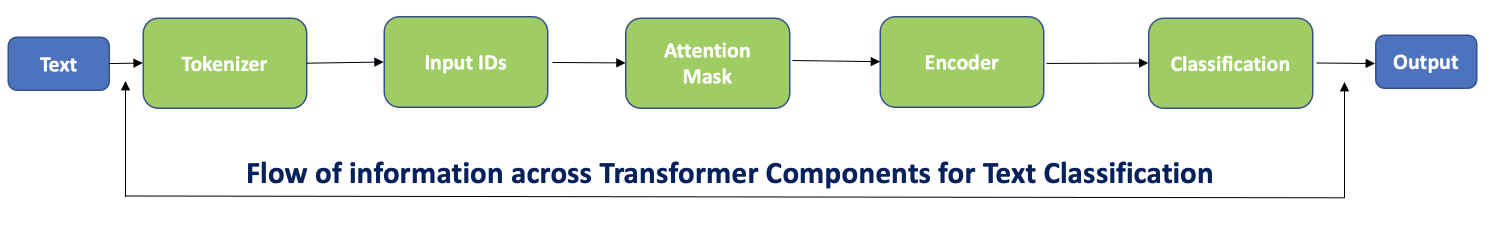

### Hugging Face

* Hugging Face is an AI community and company that has created a powerful and flexible platform for natural language processing. They are best known for their open-source library transformers, which provides thousands of pre-trained models to perform tasks on texts.

* Transformer architectures are integral to the Hugging Face library, enabling the development of advanced models for Natural Language Understanding (NLU) tasks such as Question Answering, Text Classification, Text Generation, Named Entity Recognition (NER), Semantic Role Labeling (SRL), Machine Translation, Dialogue Systems, and more.

#### Loading the dataset

To load the `datasets` in google colab:

In [ ]:
!pip install datasets

* Hugging Face provides a wide range of datasets via their datasets library, assisting organizations and developers in building NLP models.

* To load one of these datasets, including our IMDB dataset, we can use the `load_dataset()` function from the datasets library, and pass the name of the dataset as a string. The object returned by the `load_dataset() `function is a **DatasetDict** object. This is a dictionary-like object that contains Dataset objects for each split of the dataset (such as 'train', 'test', or 'unsupervised').

* Each Dataset object represents a dataset split and can be treated similarly to a Pandas DataFrame. It allows for lazy loading of data, which means the **data is only loaded when needed**. This is beneficial for large datasets as it means they don't need to be loaded into memory all at once.

In [ ]:
from datasets import load_dataset

imdb = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
imdb

In [ ]:
imdb['train'].column_names

In [ ]:
type(imdb), type(imdb['train']), type(imdb['train']['text'])

In [ ]:
len(imdb['train']['text'])

In [ ]:
imdb['train']['text'][0]

In [ ]:
imdb['train']['label'][0]

#### Tokenization with AutoTokenizer

* The AutoTokenizer class from the transformers library is a robust tool designed for preparing natural language processing data for use.

* It tokenizes raw text and returns tokens in a format that can be fed directly into a deep learning model. To start using the AutoTokenizer, we first need to import it from the transformers library.

* Then we can instantiate a tokenizer object by passing the name of a pre-trained model (as a string) to the `from_pretrained()` method, and assign the result to a variable.

In [ ]:
!pip install transformers

**DistilBERT Model**

* The DistilBERT model is a leaner version of the well-known BERT (Bidirectional Encoder Representations from Transformers) language model. DistilBERT retains most of the capabilities as BERT, but delivers them in a more efficient, condensed package.

* The two main types of DistilBERT base models are `distilbert-base-cased`and `distilbert-base-uncased`. The major distinction between them lies in how they handle case (uppercase vs lowercase letters) in the input text. The cased version of DistilBERT treats words in different cases as different tokens. For example, words like "ChatGPT" and "chatgpt" are treated as distinct entities. Conversely, the uncased version of DistilBERT treats all words as lowercase.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased', use_fast=True)

In [ ]:
tokenizer

* It can be seen that the AutoTokenizer, when fed the `distilbert-base-uncased pre-trained model`, spawns a `DistilBertTokenizerFast` tokenizer.

* This tokenizer comes with a vocabulary size of just over 30,000 words. To add some perspective, a native English speaker typically possesses an active vocabulary (words they use) of approximately 20,000 words and a passive vocabulary (words they understand but don't use) of about 40,000 words.

The default `use_fast=True` argument for the `from_pretrained()` method means the AutoTokenizer will use a faster Rust-based tokenizer if it's available for the model, otherwise a standard Python-based tokenizer is used.

In [ ]:
tokenizer.is_fast

In [ ]:
X_train = imdb['train']['text']
y_train = imdb['train']['label']

X_test = imdb['test']['text']
y_test = imdb['test']['label']

In [ ]:
len(X_train), type(X_train)

In [ ]:
len(y_train), type(y_train)

In [ ]:
len(X_test), type(X_test)

In [ ]:
len(y_test), type(y_test)

In [ ]:
train_encoding = tokenizer(X_train, max_length=128, truncation=True, padding=True)
test_encoding = tokenizer(X_test, max_length=128, truncation=True, padding=True)

In the code above:

* `max_length=128` sets the maximum input length of the sequences that the model can handle. This means that any input sequences longer than this value will be truncated to this length.

* `truncation=True` ensures that the text is pruned to a maximum length if it surpasses the model's maximum input length. Earlier, we saw this length was set to 512 but the above argument will change this to 128.

* `padding=True` when the sequence is less than 128 tokens, this argument fills in padding tokens to make all sequences the same length.

In [ ]:
train_encoding[0]

#### Preparing the dataset

**Transforming to TensorFlow Datasets**

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encoding),
    tf.constant(y_train, dtype=tf.int32)
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encoding),
    tf.constant(y_test, dtype=tf.int32)
))

* The reason the encoded data (train_encoding & test_encoding) is being converted to a dictionary is to provide a mapping between the features (input data) and their corresponding values. By passing a dictionary to `from_tensor_slices()`, **each key-value pair in the dictionary represents a specific feature and its associated values**.

* The `from_tensor_slices()` function **expects a tuple as input**, where the first element is the features (input data) and the second element is the target variable. In this case, the features are represented by the dictionary encoding_data, and the target variable is represented by the target_array (i.e., y_train and y_test).

* The use of `tf.constant()` ensures that the target variable (target_array) is treated as a constant tensor, which means it will not be modified during training or evaluation.

* Regarding the data type for the target variable, if the target_array only consists of 1s and 0s, it is possible to use a different data type, such as `tf.bool`, however, the use of `tf.int32` is also a valid choice.

**Configuring the dataset**

* Firstly, we shuffle the training dataset using the `shuffle()` function. This mixes up the order of the examples randomly. We do this to make sure that the model doesn't get influenced by the original order of the data. We want it to learn general patterns in the data without picking up on any patterns that might be present in the original order of the data.

* It's common practice to shuffle only the training dataset and keep the test dataset in its original order. This ensures that the model is tested on data that represents real-world conditions and provides a reliable evaluation of its performance.

* The `len(X_train)` parameter in the above code just tells us the number of elements in the training set, ensuring that all examples are considered during shuffling.

* Next, both the training and test datasets are batched using the `batch()` function. Batching involves grouping a number of examples together, which improves training efficiency by processing multiple examples simultaneously. Here, a batch size of 16 is chosen, which means that the model will process 16 examples at a time during training and evaluation.

In [ ]:
train_dataset = train_dataset.shuffle(len(train_dataset)).batch(16)
test_dataset = test_dataset.shuffle(len(test_dataset)).batch(16)

In [ ]:
train_dataset

#### Modeling for classification

* `TFAutoModelForSequenceClassification` is an auto class from the tranformers library that automatically selects a model for sequence classification to work with the basemodel we pass to the ``from_pretrained()` method call.

* It is designed to allow users to quickly create deep learning models without having to manually design the model architecture and layers. The class provides pre-trained models for text, audio, and image data as well as tools for fine-tuning the model on custom datasets.

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

* In the above code, the `num_labels` argument specifies the number of labels in the target variable.

* When you instantiate the model, you may get a message that seems like an error; it's not an error. It's an informational message indicating that some layers of the model checkpoint at `distilbert-base-uncased` were not used when initializing `TFDistilBertForSequenceClassification`.

* This message is expected when you initialize a model from a checkpoint that was trained on a different task or has a different architecture. However, the model also mentions that some layers like 'classifier', 'pre_classifier', and 'dropout_19' were newly initialized.

* At the end of the message, you will see something like this: **"You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference."**

* The above message suggests that if you want to use this model for predictions and inference, you should **train it on a downstream task specific to your use case**.

In [ ]:
!pip install --upgrade transformers
import transformers
print(transformers.__version__)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics=[tf.metrics.SparseCategoricalAccuracy('accuracy')]

In [ ]:
model.compile(optimizer=opt, loss=loss, metrics=metrics)

# refer this link for optimizer not recognized error: https://discuss.huggingface.co/t/pretrain-model-not-accepting-optimizer/76209/12

In [ ]:
model.fit(train_dataset, epochs=3)

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test set accuracy: {test_acc}")

After training the model, we achieved an astounding accuracy of 96% on the training set and an impressive 87% on the test set.